In [2]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f"({self.x}, {self.y})"

def plot_polygon(points, track):
    if track:
        points=[(p.x, p.y) for p in points]
        track= [(p.x, p.y) for p in track]
        start_point = track[0]
        sorted_points = []

        while len(start_point)>0:
            sorted_points.append(start_point)
            x1, y1 = start_point
            dists = {(x2, y2): np.sqrt((x1-x2)**2 + (y1-y2)**2) for x2, y2 in track}
            dists = sorted(dists.items(), key=lambda item: item[1])
            for dist in dists:
                if dist[0] not in sorted_points: 
                    start_point = dist[0]
                    break
                if dist == dists[-1]:
                    start_point = ()
                    break
        sorted_points.append(sorted_points[0])
        plt.plot(*zip(*sorted_points), 'r')
        plt.scatter(*zip(*points))
        plt.show()
    
def posicio_respecte_recta(a: Point, b: Point, c: Point) -> float:
    return (a.y - b.y) * (c.x - b.x) - (a.x - b.x) * (c.y - b.y)

def area_triangle(a: Point, b: Point, c: Point) -> float:
    return abs((a.y - b.y) * (c.x - b.x) - (a.x - b.x) * (c.y - b.y)) / 2.0

def points_up(a: Point, b: Point, points: List[Point]) -> List[Point]:
    return [p for p in points if posicio_respecte_recta(a, b, p) > 0]

def points_down(a: Point, b: Point, points: List[Point]) -> List[Point]:
    return [p for p in points if posicio_respecte_recta(a, b, p) < 0]



def convex_hull_rec(a: Point, b: Point, points: List[Point]) -> List[Point]:

    ############################### CODI A EDITAR ########################################

    concat = []

    #print(f"\nA: {a}, B: {b}")
    #print(f"points: {points}")
    if not points:
        return []

    max_point = max(points, key=lambda x: area_triangle(a, b, x))

    up_points = points_up(a, max_point, points) # funció auxiliar
    #print(f"Points up: {up_points}")
    down_points = points_down(b, max_point, points) # funció auxiliar
    #print(f"Points down: {down_points}")

    hull_up = convex_hull_rec(a, max_point, up_points)
    hull_down = convex_hull_rec(max_point, b, down_points)

    #print(f"Elements retornats: {hull_up + hull_down}")
    concat += [a] + [b] + [max_point] + hull_up + hull_down

    ############################### CODI A EDITAR #######################################

    return concat



def convex_hull(points: List[Point]) -> List[Point]:

    if len(points) < 3: return points
    
    sorted_points = sorted(points, key=lambda p: (p.x, p.y))
    a, b = sorted_points[0], sorted_points[-1] #seleccionamos inicio y final
    
    up = [p for p in sorted_points if posicio_respecte_recta(a, b, p) > 0]
    down = [p for p in sorted_points if posicio_respecte_recta(a, b, p) < 0]
    
    ch_up = convex_hull_rec(a, b, up)
    ch_down = convex_hull_rec(b, a, down)

    concat=ch_up + ch_down #concatenamos los conjuntos de puntos
    concat=([*set(concat)]) #eliminamos duplicados
    return concat

In [3]:
# Probamos con un ejemplo
points = [Point(0, 3), Point(2, 2), Point(1, 1), Point(2, 1), Point(3, 0), Point(0, 0), Point(3, 3), Point(4,3),Point(2,4)]
track = convex_hull(points)
print("Puntos del polígono convexo: ",track)

Puntos del polígono convexo:  [(0, 0), (3, 0), (4, 3), (0, 3), (2, 4)]


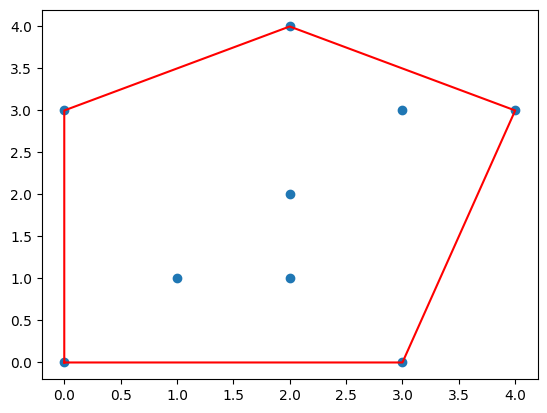

In [5]:
plot_polygon(points, track)